## Importando librerias

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import glob
import csv



Using TensorFlow backend.


## Preprocesamiento de Datos

In [0]:
def month_string_to_number(string):
	m = {
		'Jan': "01",
		'Feb': "02",
		'Mar': "03",
		'Apr':"04",
		 'May':"05",
		 'Jun':"06",
		 'Jul':"07"	,
		 'Aug': "08",
		 'Sep':"09",
		 'Oct':"10",
		 'Nov':"11",
		 'Dec':"12"
		}
	return m[string]


def preprocesarData():
	path = 'dataset/'  
	allFiles=glob.glob(path+"/*/*.txt")
	
	allFiles=sorted(allFiles)

	avgs =[]
	for oneFile in allFiles:
		filepath = oneFile
		with open(filepath) as fp:
			avgPerFile = 0
			count = 0
			line = fp.readline()
			date=""
			while line:
				var= line.split()
				size=len(var)       
				if size==0:
					break
				date = var[2][:4]+"-"+month_string_to_number(var[0])+"-"+var[1]
				avg= float(var[size-1])
				count+=1
				avgPerFile+=avg
		
				line = fp.readline()
			avgPerFile=(avgPerFile/count)
			avgs.append([date,avgPerFile])

	avgs=avgs

	with open('foo.csv', 'w') as writeFile:
		writer = csv.writer(writeFile)
		writer.writerows(avgs)

#Convierte un array de valores en matriz
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)



## Separando los datos para Entrenamiento y para Pruebas

In [6]:

print("Preprocesando DataSet")
preprocesarData()
print("Preprocesamiento Finalizado")

numpy.random.seed(7)

#Cargando dataSet
dataframe = read_csv('foo.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalizar el DataSet
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Obtener data de Entrenamiento y Test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape  X=t y Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



Preprocesando DataSet
Preprocesamiento Finalizado


## Generando el Modelo de nuestra red LSTM

In [7]:
# Generar el Modelo

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))





W0628 19:20:10.284950 140608562558848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 19:20:10.337979 140608562558848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 19:20:10.347566 140608562558848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



##  Entrenamiento

In [8]:
##Realizamos el entrenamiento
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


W0628 19:20:52.517550 140608562558848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 19:20:52.801798 140608562558848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0628 19:20:53.347896 140608562558848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0628 19:20:53.437884 140608562558848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign

Epoch 1/100
 - 2s - loss: 0.0568
Epoch 2/100
 - 1s - loss: 0.0137
Epoch 3/100
 - 1s - loss: 0.0126
Epoch 4/100
 - 1s - loss: 0.0116
Epoch 5/100
 - 1s - loss: 0.0106
Epoch 6/100
 - 1s - loss: 0.0098
Epoch 7/100
 - 1s - loss: 0.0092
Epoch 8/100
 - 1s - loss: 0.0087
Epoch 9/100
 - 1s - loss: 0.0083
Epoch 10/100
 - 1s - loss: 0.0082
Epoch 11/100
 - 1s - loss: 0.0081
Epoch 12/100
 - 1s - loss: 0.0080
Epoch 13/100
 - 1s - loss: 0.0079
Epoch 14/100
 - 1s - loss: 0.0081
Epoch 15/100
 - 1s - loss: 0.0080
Epoch 16/100
 - 1s - loss: 0.0080
Epoch 17/100
 - 1s - loss: 0.0079
Epoch 18/100
 - 1s - loss: 0.0079
Epoch 19/100
 - 1s - loss: 0.0080
Epoch 20/100
 - 1s - loss: 0.0079
Epoch 21/100
 - 1s - loss: 0.0077
Epoch 22/100
 - 1s - loss: 0.0080
Epoch 23/100
 - 1s - loss: 0.0079
Epoch 24/100
 - 1s - loss: 0.0080
Epoch 25/100
 - 1s - loss: 0.0078
Epoch 26/100
 - 1s - loss: 0.0078
Epoch 27/100
 - 1s - loss: 0.0080
Epoch 28/100
 - 1s - loss: 0.0079
Epoch 29/100
 - 1s - loss: 0.0078
Epoch 30/100
 - 1s - lo

## Calcular las predicciones

In [0]:
#Hacer Predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


## Calcular el Error RMSE

In [10]:

# Calcular RMSE 
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



Train Score: 0.01 RMSE
Test Score: 0.02 RMSE


## Graficar los resultados

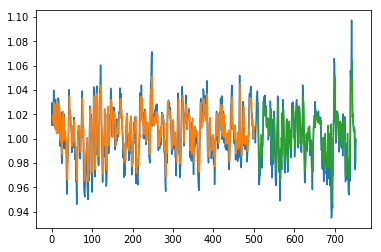

In [11]:
# Grafico de entrenamiento
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Grafico de Prueba
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Grafico de predicciones
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()